In [1]:
%matplotlib notebook
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Creating the element matrix for a beam

In [2]:
NElements = 10

In [3]:
# mass matrix
m = np.array([[2,1],[1,2]])/(6. * float(NElements))
# stiffness matrix
k = np.array([[1,-1],[-1,1]])*(float(NElements))
print(m,k)

(array([[0.03333333, 0.01666667],
       [0.01666667, 0.03333333]]), array([[ 10., -10.],
       [-10.,  10.]]))


In [4]:
dfreedom = [0,]

# Assembly matrix

In [5]:
def GetAssembledMatrix(NElements,dfreedom,m):
    
    M = np.zeros((NElements+1,NElements+1))
    
    for i in range(NElements):
        Temp = np.zeros((NElements+1,NElements+1))
        Temp[i:i+2,i:i+2] = m
        M += Temp
        
    for i in dfreedom:
        for j in [0,1]:
            M = np.delete(M,i,axis=j)
            
    return M

In [6]:
Am = GetAssembledMatrix(NElements,dfreedom,m)
Ak = GetAssembledMatrix(NElements,dfreedom,k)

In [7]:
print(Am)

[[0.06666667 0.01666667 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.01666667 0.06666667 0.01666667 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.01666667 0.06666667 0.01666667 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.01666667 0.06666667 0.01666667 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.01666667 0.06666667 0.01666667
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.01666667 0.06666667
  0.01666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.01666667
  0.06666667 0.01666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.01666667 0.06666667 0.01666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.01666667 0.06666667 0.01666667]
 [0.         

In [8]:
print(Ak)

[[ 20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  20. -10.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  10.]]


In [9]:
evals, evecs = eigh(Ak,Am)
print(evals[0], np.sqrt(evals[0]))

(2.472478652658217, 1.5724117312772177)


In [10]:
frecuencias = np.sqrt(evals)
print(frecuencias)

[ 1.57241173  4.75610398  8.05707841 11.55418418 15.3202872  19.40022863
 23.75474269 28.14651567 31.98583136 34.32358567]


In [11]:
print(np.pi/2)

1.57079632679


In [15]:
t = np.linspace(0.,5.,50)

Particles = []

frecuencia = 0

for i in range(len(evecs[0])):
    x = evecs[frecuencia][i]*np.cos(evals[frecuencia]*t)
    Particles.append(x)
    
Particles = np.array(Particles)

# Agregar posiciones iniciales
xmin = 0.
xmax = 40.
x0 = np.linspace(xmin,xmax,NElements)

for i in range(len(Particles)):
    Particles[i] += x0[i]

In [16]:
#plt.plot(t,Particles[0])

<IPython.core.display.Javascript object>


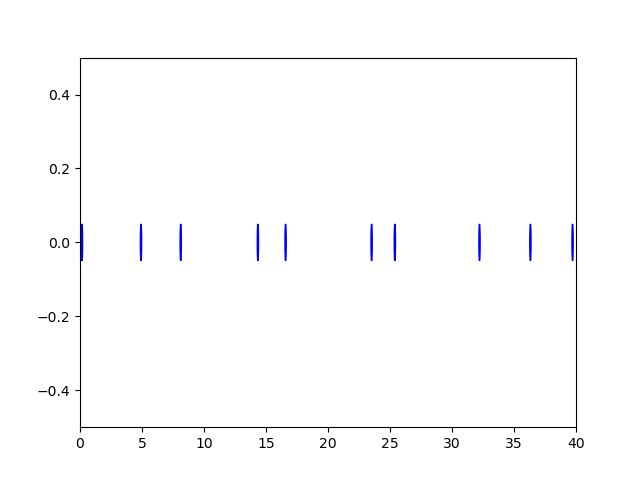

In [21]:
y = np.linspace(0,10,20)
Nframes = len(t) 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(-xmin,xmax+xmin)
    ax.set_ylim(-0.5,0.5)
    
def Update(i):
    
    plot = ax.clear()
    init()
    
    #for j in y:
    for p in range(len(Particles)):
            #plot = ax.scatter(Particles[p][i],0.,s=5)
        circle = plt.Circle((Particles[p][i],0), 0.05, color='b')
        plot = ax.add_patch(circle)
        
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=Nframes, init_func=init)